# Pysaliency: Testing how to load and use different modalities 

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set_style('white')
plt.rcParams['image.cmap'] = 'gray'

In [4]:
# Load The Image
path = './imgs/balloons.png'
img = mpimg.imread(path)

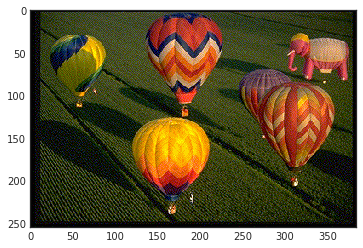

In [5]:
plt.imshow(img);

In [6]:
import pysaliency
import pysaliency.external_datasets
# from saliency_model.itti_koch import IttiKoch


/home/ateska/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Check if system has Matlab or Octave

In [7]:
from pysaliency.utils import MatlabOptions

In [8]:
MatlabOptions.matlab_names = ['matlab', 'matlab.exe', '/usr/local/MATLAB/R2017b/bin/matlab']
MatlabOptions.matlab_names

['matlab', 'matlab.exe', '/usr/local/MATLAB/R2017b/bin/matlab']

In [9]:
MatlabOptions.octave_names = []
MatlabOptions.octave_names

[]

In [10]:
def is_exe(fpath):
        return os.path.isfile(fpath) and os.access(fpath, os.X_OK)

In [11]:
def which(program):
    """
    Check whether a program is present on the system.
    from https://stackoverflow.com/a/377028
    """
    

    fpath, fname = os.path.split(program)
    if fpath:
        if is_exe(program):
            return program
    else:
        for path in os.environ["PATH"].split(os.pathsep):
            path = path.strip('"')
            exe_file = os.path.join(path, program)
            if is_exe(exe_file):
                return exe_file

    return None

In [12]:
is_exe('/usr/local/MATLAB/R2017b/bin/matlab')

True

In [13]:
is_exe('/octave.exe')

False

## AIM model

In [14]:
aim = pysaliency.AIM(location='test_models', cache_location=os.path.join('model_caches', 'AIM'))

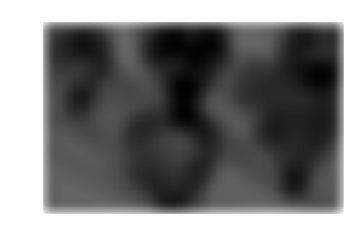

In [15]:
smap = aim.saliency_map(img)
plt.imshow(-smap)
plt.axis('off');